# Simple Domain formation illustration

- This notebook shows that all you need for domain formation is an energy penalty proportional to stray field and a favourable energy for alginment
    - Start with initally 'random' polarisations
    - Align moments with application of E field
    - See what structure the moments relax to when the field is removed
    
Linke to Google Colab: https://colab.research.google.com/drive/1gtZINYXnT4gf0IygCJTA64T-8GVmKv7X?usp=sharing


## Import

In [113]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import Bounds

## Create initially random dipoles
- Dipole can either point up (red) or down (blue) in this simple model)

Text(0.5, 1.0, 'Initial polarisation')

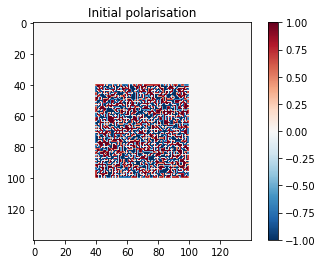

In [150]:
# Initialise in random state
P = np.random.randint(0,2,(60,60))*2-1
# Add vacuum
P = np.pad(P,(40,40))

# Plot
plt.imshow(P,cmap='RdBu_r',vmax=1,vmin=-1)
plt.colorbar()
plt.title('Initial polarisation')

## Align with an external field

Text(0.5, 1.0, 'Polarisation after applying field of 1')

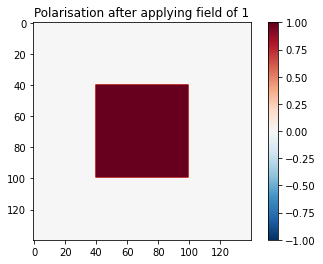

In [151]:
# Apply a field - either up or down
E = 1
particle = np.where(P!=0)
P[particle] = E

# Plot
plt.imshow(P,cmap='RdBu_r',vmax=1,vmin=-1)
plt.colorbar()
plt.title('Polarisation after applying field of %i' %E)

## Define the total energy depending on stray penalty / favourable alignment
- In this very simple model, we make many approximations:
    - Dipoles can only point up or down
    - Each column contributes +1 stray field if pointing up, or -1 stray field if pointing down
    - The total stray field is the sum across all columns in the material
    - If neighbouring columns both point in the same direction, they get +1 favourable energy

In [155]:
def total_energy(vertical_directions,stray_energy=1,alignment_energy=1):   
    # Penalty = Sum all columns (+1 up, -1 down)
    total_penalty = np.sum(vertical_directions*stray_energy)
    
    # Favourable = Sum number of aligned columns
    total_alignment = 0
    for i, d in enumerate(vertical_directions[:-1]):
        if d == vertical_directions[i+1] and d !=0:
            total_alignment +=alignment_energy
            
    # Net energy
    total_energy = total_penalty - total_alignment
    
    return total_energy

In [156]:
vertical_directions = np.mean(P,axis=0)[40:-40]
total_energy(vertical_directions,stray_energy=1,alignment_energy=1)

-33.28571428571429

## Define a function which relaxes the structure to minimum total energy
- Physical systems always minimise their energy
- We can use a numerical solver to do this for us
- See what happens if we change the penalty/favourable variables

In [157]:
def relax_structure(P,stray_energy=1,alignment_energy=1):
    # Look at column directions
    vertical_directions = np.mean(P,axis=0)[40:-40]
    
    # Minimise energy using our total_energy calculator
    bounds = Bounds(1,-1)
    res = minimize(total_energy, vertical_directions, args=(stray_energy,alignment_energy),method='trust-constr',bounds=bounds)
    
    # Redefine shape using minimised structure
    P_min = res.x*np.ones((60,60))
    P_min = np.pad(P_min,(40,40))
    P_min[np.where(P_min>0)] = 1
    P_min[np.where(P_min<0)] = -1
    
    return P_min

### Now let's see what happens

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Text(0.5, 1.0, 'Minimised - Etot = 18.14')

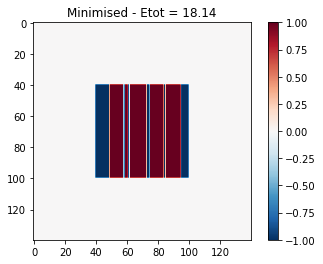

In [171]:
stray_energy=3
alignment_energy=1

P_min = relax_structure(P,stray_energy=stray_energy,alignment_energy=alignment_energy)

# plot
plt.imshow(P_min,cmap='RdBu_r',vmax=1,vmin=-1)
plt.colorbar()
Etot = total_energy(vertical_directions,stray_energy=stray_energy,alignment_energy=alignment_energy)
plt.title('Minimised - Etot = %.2f' % Etot)